# Regression Model For Insurance Data

### _This Jupyter notebook contains a comprehensive regression model for insurance data._

__The goal of this analysis is to develop a predictive model that can accurately estimate insurance costs based on various factors. The dataset used in this notebook comprises anonymized information about individuals, including their age, gender, BMI (Body Mass Index), number of children, smoking habits, region, and the corresponding insurance charges.__

In [1]:
# Imports of all required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Loading a csv file into pandas dataframe
df = pd.read_csv("C:\\Users\\chand\\Machine Learning\\insurance.csv")

## _Preprocessing & Cleaning of Data_

In [3]:
# Preview of top 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Preview of bottom 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
# Shape of dataframe
df.shape

(1338, 7)

___There are a total of 1338 rows & 7 columns___

In [6]:
# Check for NULL values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

___There are no NULL values in any of the columns.___

In [7]:
# Check for duplicate rows
df[df.duplicated()==True]

#df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# Dumping off the duplicates
df.drop_duplicates(keep='first', inplace=True)

In [9]:
# Shape of dataframe after deletion of duplicate(s)
df.shape

(1337, 7)

In [10]:
# NULL value check & Data type for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [11]:
# Function to identify the categorical & numerical column

def column_type(dataframe):
    categorical_columns = []
    numerical_columns = []
    
    for column in dataframe.columns:
        if dataframe[column].dtype==object:
            categorical_columns.append(column)
        else:
            numerical_columns.append(column)
            
    return categorical_columns, numerical_columns

In [12]:
categorical_columns, numerical_columns = column_type(df)

print('Categorical Columns: ', categorical_columns)
print('Numerical Columns: ', numerical_columns)

Categorical Columns:  ['sex', 'smoker', 'region']
Numerical Columns:  ['age', 'bmi', 'children', 'charges']


In [13]:
# Total rows count for categorical column by its category

def column_wise_dataset_count(dataframe):
    categorical_columns, numerical_columns = column_type(dataframe)
    for column in categorical_columns:
        print(dataframe.groupby(by=column).count())
        print('-'*53)
        print()
        
column_wise_dataset_count(df)

        age  bmi  children  smoker  region  charges
sex                                                
female  662  662       662     662     662      662
male    675  675       675     675     675      675
-----------------------------------------------------

         age   sex   bmi  children  region  charges
smoker                                             
no      1063  1063  1063      1063    1063     1063
yes      274   274   274       274     274      274
-----------------------------------------------------

           age  sex  bmi  children  smoker  charges
region                                             
northeast  324  324  324       324     324      324
northwest  324  324  324       324     324      324
southeast  364  364  364       364     364      364
southwest  325  325  325       325     325      325
-----------------------------------------------------



## _Descriptive Statistics Analysis_

In [14]:
# Statistical information for numerical columns
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
# Statistical information for categorical columns
df.describe(include = 'object')

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


## _Visualisation of Categorical Columns_

In [16]:
categorical_columns

['sex', 'smoker', 'region']

In [17]:
df[categorical_columns[0]].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [18]:
# Function for scatter-plot for categorical columns by its category

def scatterplot(dataframe):
    categorical_columns, numerical_columns = column_type(dataframe)
    for i in range(len(categorical_columns)):
        plt.subplot(2, 2, i+1)
        plt.scatter(x=dataframe[categorical_columns[i]], y=dataframe[numerical_columns[-1]], linewidths=0.5, edgecolors='red')
        plt.title(f'{categorical_columns[i]} vs {numerical_columns[-1]}')
        print(dataframe[categorical_columns[i]].value_counts())
        print()

sex
male      675
female    662
Name: count, dtype: int64

smoker
no     1063
yes     274
Name: count, dtype: int64

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



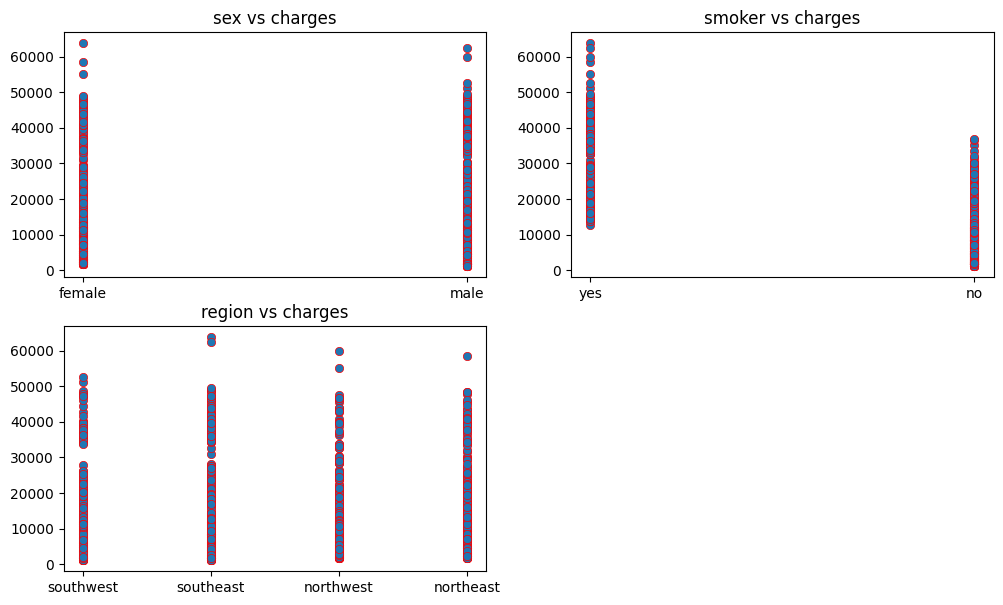

In [19]:
plt.figure(figsize=(12,7))
scatterplot(df)

## _Visualisation of Numerical Columns_

In [20]:
numerical_columns

['age', 'bmi', 'children', 'charges']

Text(0.5, 1.0, 'KDE Plot for Age')

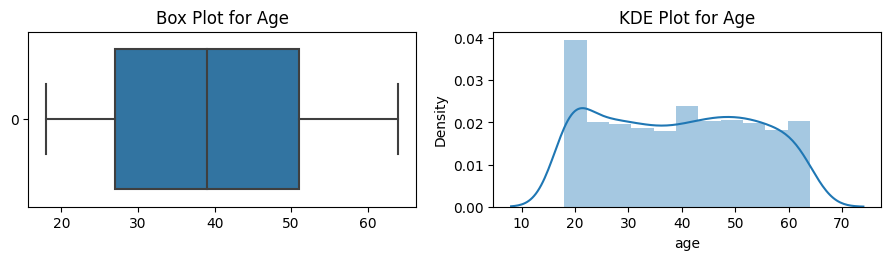

In [21]:
plt.figure(figsize=(11, 5))

plt.subplot(2, 2, 1)
sns.boxplot(df.age, orient='h')
plt.title('Box Plot for Age')

plt.subplot(2, 2, 2)
sns.distplot(df.age, kde=True, hist=True)
plt.title('KDE Plot for Age')

___There are no outliers in the age column.___

Text(0.5, 1.0, 'KDE Plot for BMI')

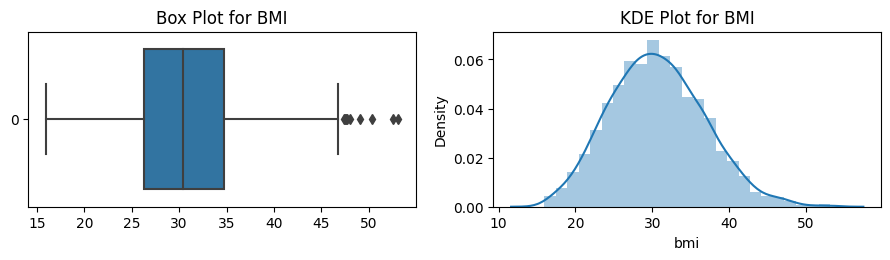

In [22]:
plt.figure(figsize=(11, 5))

plt.subplot(2, 2, 1)
sns.boxplot(df.bmi, orient='h')
plt.title('Box Plot for BMI')

plt.subplot(2, 2, 2)
sns.distplot(df.bmi, kde=True, hist=True)
plt.title('KDE Plot for BMI')

___There are outliers present for bmi column___

Text(0.5, 1.0, 'KDE Plot for Children')

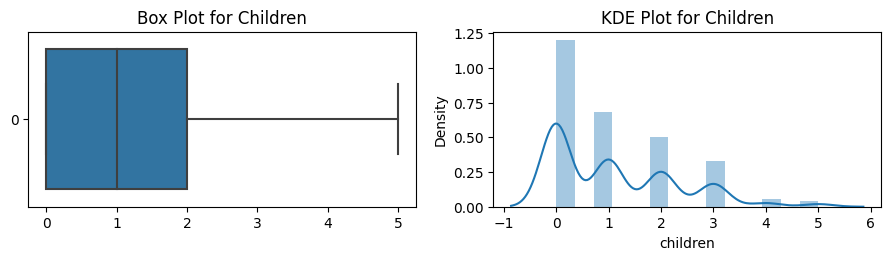

In [23]:
plt.figure(figsize=(11, 5))

plt.subplot(2, 2, 1)
sns.boxplot(df.children, orient='h')
plt.title('Box Plot for Children')

plt.subplot(2, 2, 2)
sns.distplot(df.children, kde=True, hist=True)
plt.title('KDE Plot for Children')

___There are a few outliers present for children column (rightly skewed)___

In [24]:
# Function to check the outliers

def check_outlier(dataframe):
    for column in dataframe.columns[:-1]:
        if dataframe[column].dtype != object:   
            column_mean = dataframe[column].mean()
            column_std = dataframe[column].std()
            print(f'Column: {column},  Mean: {column_mean}, Standard Deviation: {column_std}')
            print('-'*80)
            print('Dataset present between Mean & 2 Standard Deviation: ', dataframe[(dataframe[column] >= column_mean - 2*column_std) &
                            (dataframe[column] <= column_mean + 2*column_std)].shape)
            print('Total Dataset Count: ', dataframe.shape)
            print()

In [25]:
check_outlier(df)

Column: age,  Mean: 39.222139117427076, Standard Deviation: 14.044332734156425
--------------------------------------------------------------------------------
Dataset present between Mean & 2 Standard Deviation:  (1337, 7)
Total Dataset Count:  (1337, 7)

Column: bmi,  Mean: 30.66345175766642, Standard Deviation: 6.100468409615801
--------------------------------------------------------------------------------
Dataset present between Mean & 2 Standard Deviation:  (1280, 7)
Total Dataset Count:  (1337, 7)

Column: children,  Mean: 1.0957367240089753, Standard Deviation: 1.2055714286412176
--------------------------------------------------------------------------------
Dataset present between Mean & 2 Standard Deviation:  (1294, 7)
Total Dataset Count:  (1337, 7)



In [26]:
# Remove the outliers present in bmi column
bmi_mean = df['bmi'].mean()
bmi_std = df['bmi'].std()
df2 = df[(df['bmi'] >= bmi_mean - 2*bmi_std) & (df['bmi'] <= bmi_mean + 2*bmi_std)]
df2.shape

(1280, 7)

Text(0.5, 1.0, 'KDE Plot for BMI')

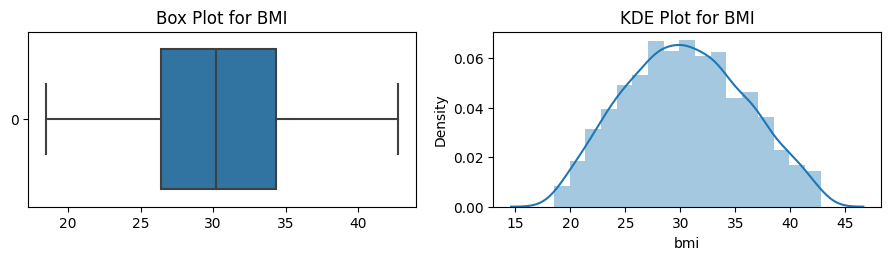

In [27]:
plt.figure(figsize=(11, 5))

plt.subplot(2, 2, 1)
sns.boxplot(df2.bmi, orient='h')
plt.title('Box Plot for BMI')

plt.subplot(2, 2, 2)
sns.distplot(df2.bmi, kde=True, hist=True)
plt.title('KDE Plot for BMI')

In [28]:
df2['children'].value_counts()

children
0    554
1    310
2    222
3    153
4     25
5     16
Name: count, dtype: int64

In [29]:
# Removing the datasets having 4 or more children
df3 = df2[~((df2['children']==5) | (df2['children']==4))]
df3.shape

(1239, 7)

Text(0.5, 1.0, 'KDE Plot for Children')

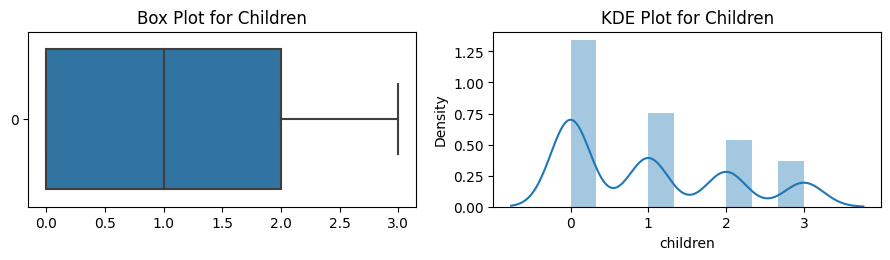

In [30]:
plt.figure(figsize=(11, 5))

plt.subplot(2, 2, 1)
sns.boxplot(df3.children, orient='h')
plt.title('Box Plot for Children')

plt.subplot(2, 2, 2)
sns.distplot(df3.children, kde=True, hist=True)
plt.title('KDE Plot for Children')

## _Bivariate Analysis_

In [31]:
categorical_columns, numerical_columns

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children', 'charges'])

<Axes: xlabel='age', ylabel='charges'>

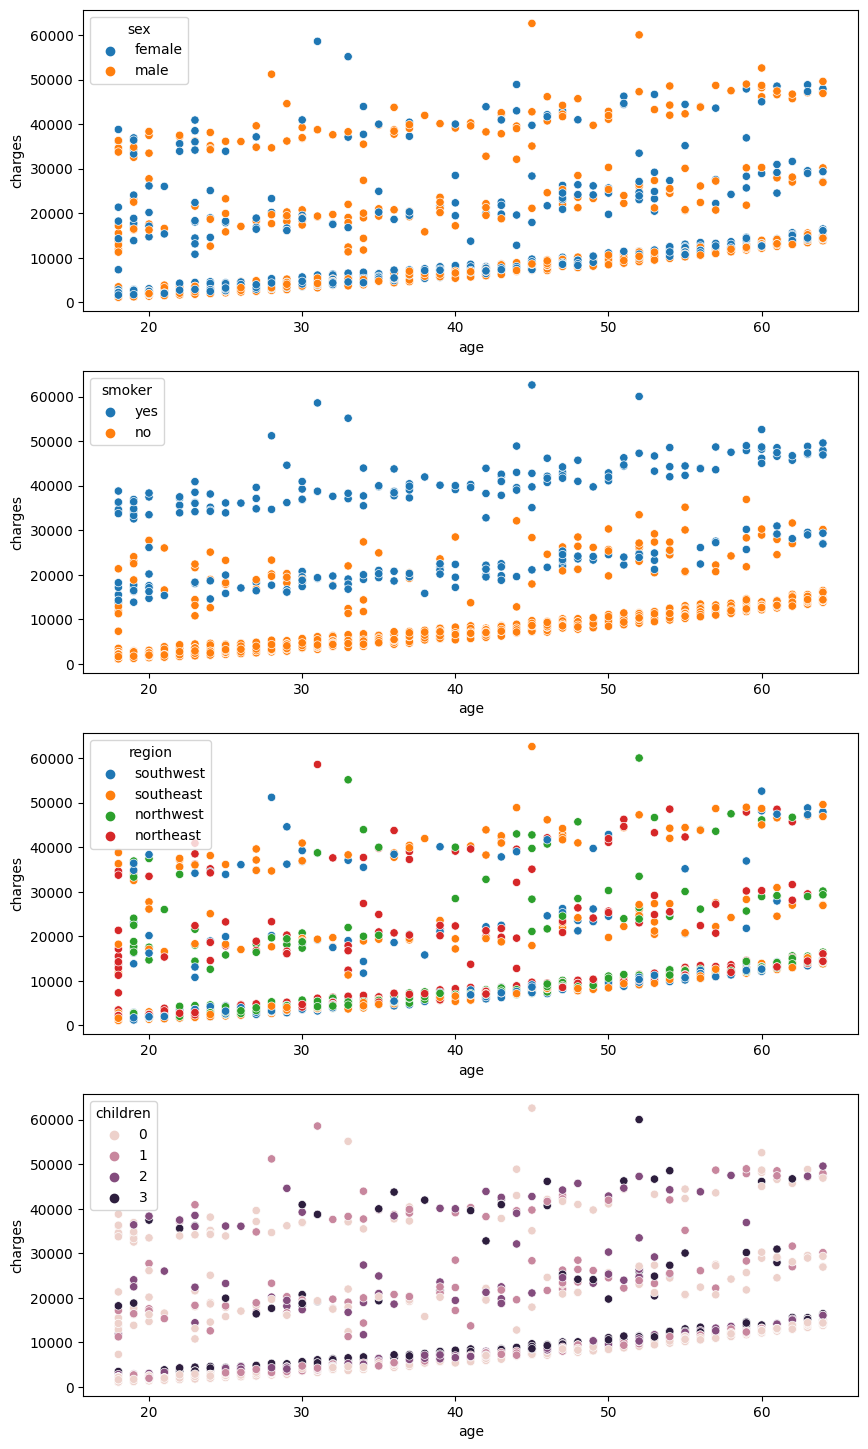

In [32]:
plt.figure(figsize=(10, 18))

x=df3[numerical_columns[0]]
y=df3[numerical_columns[-1]]

plt.subplot(4, 1, 1)
sns.scatterplot(x=x, y=y, hue=df3.sex)

plt.subplot(4, 1, 2)
sns.scatterplot(x=x, y=y, hue=df3.smoker)

plt.subplot(4, 1, 3)
sns.scatterplot(x=x, y=y, hue=df3.region)

plt.subplot(4, 1, 4)
sns.scatterplot(x=x, y=y, hue=df3.children)

In [33]:
# Function to calculate mean value of insurance amount by category

def mean_value_by_category(dataframe):
    categorical_columns, numerical_columns = column_type(dataframe)
    for col in categorical_columns:
        print(dataframe.groupby(col)[numerical_columns[-1]].mean())
        print('-'*30)
        print()

In [34]:
mean_value_by_category(df3)

sex
female    12446.962287
male      14201.195245
Name: charges, dtype: float64
------------------------------

smoker
no      8440.926616
yes    31908.411485
Name: charges, dtype: float64
------------------------------

region
northeast    13619.922023
northwest    12576.375642
southeast    14609.007666
southwest    12406.160450
Name: charges, dtype: float64
------------------------------



__The mean value of insurance by gender is quite close.__ ___(Female: 12446.962287 & Male: 14201.195245).___  Also, every age group of both gender are randomly associated with the insurance.

__The mean value of insurance by smoker (smoking habit) has a very diverse value.__ ___(No: 8440.926616 & Yes: 31908.411485)___

___The mean value of insurance by region is quite close.___


<Axes: xlabel='bmi', ylabel='charges'>

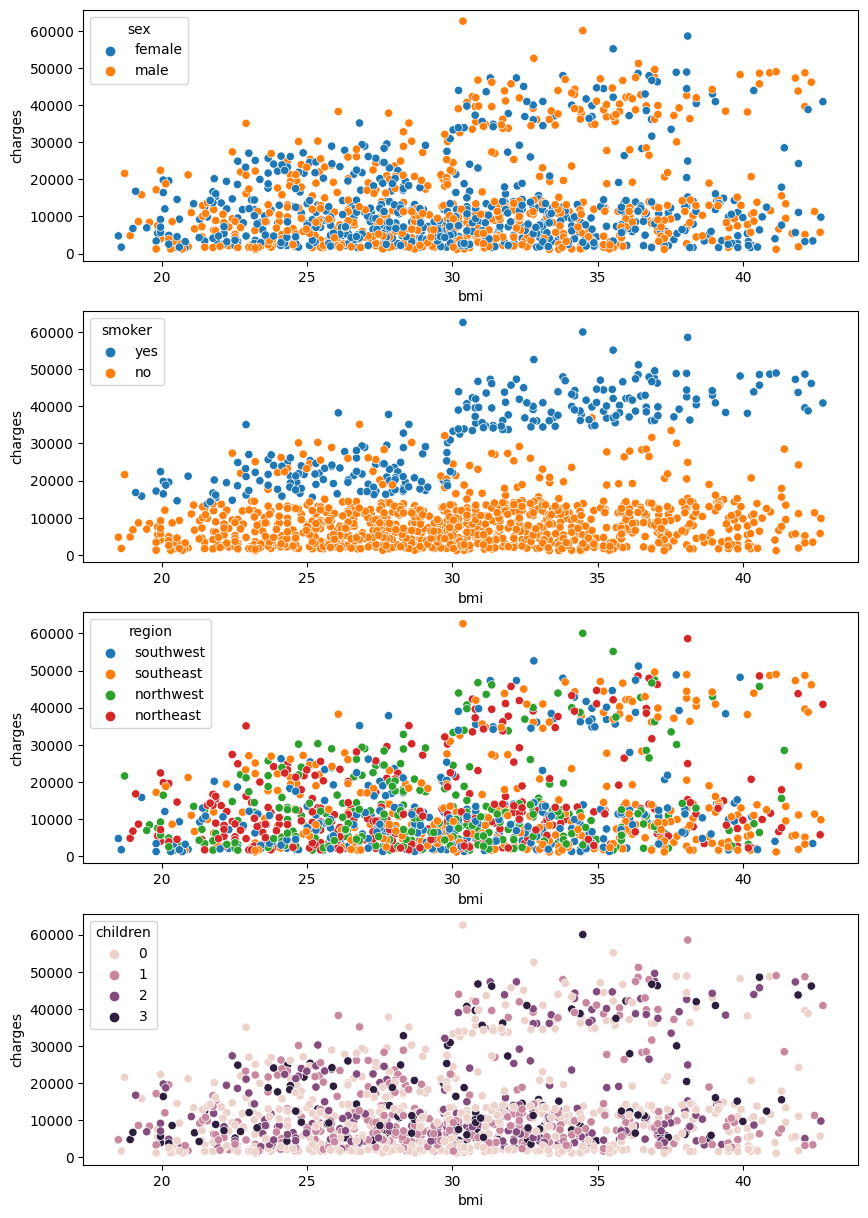

In [35]:
plt.figure(figsize=(10, 15))
x=df3[numerical_columns[1]]
y=df3[numerical_columns[-1]]

plt.subplot(4, 1, 1)
sns.scatterplot(x=x, y=y, hue=df3.sex)

plt.subplot(4, 1, 2)
sns.scatterplot(x=x, y=y, hue=df3.smoker)

plt.subplot(4, 1, 3)
sns.scatterplot(x=x, y=y, hue=df3.region)

plt.subplot(4, 1, 4)
sns.scatterplot(x=x, y=y, hue=df3.children)

## _Correlation-Check_

In [36]:
df3.drop(['sex', 'smoker', 'region'], axis=1).corr()

,age,bmi,children,charges
age,1.000000,0.105333,0.068752,0.304203
bmi,0.105333,1.000000,-0.004069,0.202830
children,0.068752,-0.004069,1.000000,0.098440
charges,0.304203,0.202830,0.098440,1.000000


<Figure size 700x200 with 0 Axes>

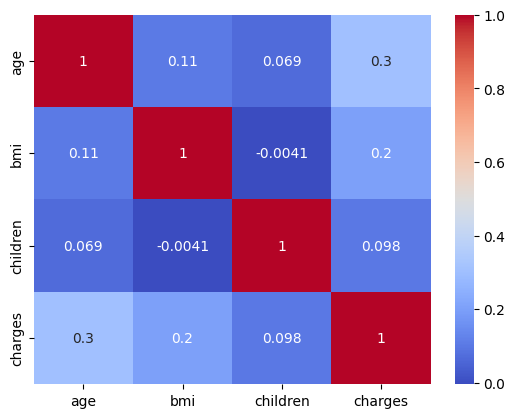

<Figure size 700x200 with 0 Axes>

In [37]:
sns.heatmap(df3.drop(['sex', 'smoker', 'region'], axis=1).corr(), annot=True, cmap='coolwarm')
plt.figure(figsize=(7, 2))

___None of the columns are strongly related to one other.___

___Even the label variable i.e charges is not strongly related with any features column. Although, the Label column is +vely influenced (weekly) by the feature columns.___

___Features like bmi and children are -vely (very weekly) related to each-other.___

## _Preprocessing with Scikit Module_

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import metrics
import math

In [39]:
# Identify the independent columns (feature-matrix) & dependent/target column (label column)
X = df3.drop('charges', axis=1)
y = df3['charges']

In [40]:
# Splittiong of datasets into train and test sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [41]:
# Shape of train & test data sample
X_train.shape, X_test.shape

((991, 6), (248, 6))

In [42]:
# One hot encoding for categorical columns
col_trans = make_column_transformer((OneHotEncoder(sparse=False), ['sex','smoker', 'region']),remainder='passthrough')

In [43]:
# Scaling of numerical columns
scaled = StandardScaler()

## _Linear Regression_

In [44]:
lin_reg = LinearRegression()

In [45]:
pipe = make_pipeline(col_trans,scaled,lin_reg)

In [46]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [47]:
y_pred = pipe.predict(X_test)
len(y_pred), len(y_test)

(248, 248)

In [48]:
pipe.score(X_train, y_train)

0.7599964853784382

In [49]:
pipe.score(X_test, y_test)

0.7184136413669748

In [50]:
metrics.mean_absolute_error(y_test, y_pred)

4105.436117618184

In [51]:
math.sqrt(metrics.mean_squared_error(y_test, y_pred))

5703.044234249327

In [52]:
metrics.r2_score(y_test, y_pred)

0.7184136413669748

In [53]:
col = ['Training Accuracy','Testing Accuracy' ,'Mean Absolute Error','Root Mean Square Error','R Square Value']

linear_model_report = pd.DataFrame({'Training Accuracy': pipe.score(X_train, y_train),
                             'Testing Accuracy': pipe.score(X_test, y_test),
                              'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
                             'Root Mean Square Error': math.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                             'R Square Value': metrics.r2_score(y_test, y_pred)},
                              columns=col, index=['Linear Regression'])

linear_model_report

,Training Accuracy,Testing Accuracy,Mean Absolute Error,Root Mean Square Error,R Square Value
Linear Regression,0.759996,0.718414,4105.436118,5703.044234,0.718414


## _Lasso Regression_

In [54]:
lasso_reg = Lasso(alpha=0.1)

In [55]:
pipe = make_pipeline(col_trans,scaled,lasso_reg)

In [56]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.1))])

In [57]:
y_pred = pipe.predict(X_test)

In [58]:
pipe.score(X_train, y_train)

0.7603391668098954

In [59]:
pipe.score(X_test, y_test)

0.7158458548284727

In [60]:
metrics.mean_absolute_error(y_test, y_pred)

4061.108013680136

In [61]:
math.sqrt(metrics.mean_squared_error(y_test, y_pred))

5728.9882581700485

In [62]:
metrics.r2_score(y_test, y_pred)

0.7158458548284727

In [63]:
lasso_model_report = pd.DataFrame({'Training Accuracy': pipe.score(X_train, y_train),
                             'Testing Accuracy': pipe.score(X_test, y_test),
                              'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
                             'Root Mean Square Error': math.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                             'R Square Value': metrics.r2_score(y_test, y_pred)},
                              columns=col, index=['Lasso Regression'])

lasso_model_report

,Training Accuracy,Testing Accuracy,Mean Absolute Error,Root Mean Square Error,R Square Value
Lasso Regression,0.760339,0.715846,4061.108014,5728.988258,0.715846


## _Ridge Regression_

In [64]:
ridge_reg = Ridge(alpha=0.01)

In [65]:
pipe = make_pipeline(col_trans, scaled, ridge_reg)

In [66]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=0.01))])

In [67]:
y_pred = pipe.predict(X_test)

In [68]:
pipe.score(X_train, y_train)

0.7603391672900622

In [69]:
pipe.score(X_test, y_test)

0.7158453200776169

In [70]:
metrics.mean_absolute_error(y_test, y_pred)

4061.1183172122564

In [71]:
math.sqrt(metrics.mean_squared_error(y_test, y_pred))

5728.993648870808

In [72]:
metrics.r2_score(y_test, y_pred)

0.7158453200776169

In [73]:
ridge_model_report = pd.DataFrame({'Training Accuracy': pipe.score(X_train, y_train),
                             'Testing Accuracy': pipe.score(X_test, y_test),
                              'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
                             'Root Mean Square Error': math.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                             'R Square Value': metrics.r2_score(y_test, y_pred)},
                                 columns=col, index=['Ridge Regression'])
ridge_model_report

,Training Accuracy,Testing Accuracy,Mean Absolute Error,Root Mean Square Error,R Square Value
Ridge Regression,0.760339,0.715845,4061.118317,5728.993649,0.715845


## _Random Forest Regressor_

In [74]:
rf_reg = RandomForestRegressor(n_estimators=50)

In [75]:
pipe = make_pipeline(col_trans, scaled, rf_reg)

In [76]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=50))])

In [77]:
y_pred = pipe.predict(X_test)

In [78]:
pipe.score(X_train, y_train)

0.9760475952508714

In [79]:
pipe.score(X_test, y_test)

0.8007403578342416

In [80]:
metrics.mean_absolute_error(y_test, y_pred)

2753.2144794030382

In [81]:
math.sqrt(metrics.mean_squared_error(y_test, y_pred))

4797.451658611583

In [82]:
metrics.r2_score(y_test, y_pred)

0.8007403578342416

In [83]:
rf_model_report = pd.DataFrame({'Training Accuracy': pipe.score(X_train, y_train),
                             'Testing Accuracy': pipe.score(X_test, y_test),
                              'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
                             'Root Mean Square Error': math.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                             'R Square Value': metrics.r2_score(y_test, y_pred)},
                                 columns=col, index=['Random Forest Regression'])
rf_model_report

,Training Accuracy,Testing Accuracy,Mean Absolute Error,Root Mean Square Error,R Square Value
Random Forest Regression,0.976048,0.80074,2753.214479,4797.451659,0.80074


## _Gradient Boosting Regressor_

In [84]:
gb_reg = GradientBoostingRegressor()

In [85]:
pipe = make_pipeline(col_trans, scaled, gb_reg)

In [86]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [87]:
y_pred = pipe.predict(X_test)

In [88]:
pipe.score(X_train, y_train)

0.9046697620719566

In [89]:
pipe.score(X_test, y_test)

0.843867509386928

In [90]:
metrics.mean_absolute_error(y_test, y_pred)

2488.6976599734508

In [91]:
math.sqrt(metrics.mean_squared_error(y_test, y_pred))

4246.660846203012

In [92]:
metrics.r2_score(y_test, y_pred)

0.843867509386928

In [93]:
gb_model_report = pd.DataFrame({'Training Accuracy': pipe.score(X_train, y_train),
                             'Testing Accuracy': pipe.score(X_test, y_test),
                              'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
                             'Root Mean Square Error': math.sqrt(metrics.mean_squared_error(y_test, y_pred)),
                             'R Square Value': metrics.r2_score(y_test, y_pred)},
                                 columns=col, index=['Gradient Booster Regression'])
gb_model_report

,Training Accuracy,Testing Accuracy,Mean Absolute Error,Root Mean Square Error,R Square Value
Gradient Booster Regression,0.90467,0.843868,2488.69766,4246.660846,0.843868


## _Comparision of Models_

In [94]:
final_report = pd.concat([linear_model_report, lasso_model_report, ridge_model_report, rf_model_report, gb_model_report],
                         axis=0)
final_report

,Training Accuracy,Testing Accuracy,Mean Absolute Error,Root Mean Square Error,R Square Value
Linear Regression,0.759996,0.718414,4105.436118,5703.044234,0.718414
Lasso Regression,0.760339,0.715846,4061.108014,5728.988258,0.715846
Ridge Regression,0.760339,0.715845,4061.118317,5728.993649,0.715845
Random Forest Regression,0.976048,0.800740,2753.214479,4797.451659,0.800740
Gradient Booster Regression,0.904670,0.843868,2488.697660,4246.660846,0.843868
